# Data API


This tutorial is separated into three main parts: the first two parts shows how to find and get data to do impact calculations and should be enough for most users. The third part provides more detailed information on how the API is built.

## Contents

- [Finding Datasets](#Finding-datasets)
    - [Data types and data type groups](#Data-types-and-data-type-groups)
    - [Datasets and Properties](#Datasets-and-Properties)
- [Basic impact calculation](#Basic-impact-calculation)
    - [Wrapper functions to open datasets as CLIMADA objects](#Wrapper-functions-to-open-datasets-as-CLIMADA-objects)
- [Technical Information](#Technical-Information)
    - [Server](#Server)
    - [Client](#Client)
    - [Metadata](#Metadata)
    - [Download](#Download)

# Finding datasets

In [2]:
from climada.util.api_client import Client
client = Client()

## Data types and data type groups
The datasets are first separated into 'data_type_groups', which represent the main classes of CLIMADA (exposures, hazard, vulnerability, ...). So far, data is available for exposures and hazard. Then, data is separated into data_types, representing the different hazards and exposures available in CLIMADA

In [43]:
import pandas as pd
data_types = client.list_data_type_infos()

dtf = pd.DataFrame(data_types)
dtf.sort_values(['data_type_group', 'data_type'])

,data_type,data_type_group,status,description,properties
3,crop_production,exposures,active,None,"[{'property': 'crop', 'mandatory': True, 'desc..."
0,litpop,exposures,active,None,"[{'property': 'res_arcsec', 'mandatory': False..."
5,centroids,hazard,active,None,[]
2,river_flood,hazard,active,None,"[{'property': 'res_arcsec', 'mandatory': False..."
4,storm_europe,hazard,active,None,"[{'property': 'country_iso3alpha', 'mandatory'..."
1,tropical_cyclone,hazard,active,None,"[{'property': 'res_arcsec', 'mandatory': True,..."


## Datasets and Properties
For each data type, the single datasets can be differentiated based on properties. The following function provides a table listing the properties and possible values. This table does not provide information on properties that can be combined but the search can be refined in order to find properties to query a unique dataset. Note that a maximum of 10 property values are shown here, but many more countries are available for example.

In [16]:
litpop_dataset_infos = client.list_dataset_infos(data_type='litpop')

In [3]:
all_properties = client.get_property_values(litpop_dataset_infos)

In [5]:
all_properties.keys()

dict_keys(['res_arcsec', 'spatial_coverage', 'country_name', 'exponents', 'fin_mode', 'country_iso3alpha'])

### Refining the search:

In [3]:
# as datasets are usually available per country, chosing a country or global dataset reduces the options
# here we want to see which datasets are available for litpop globally:
client.get_property_values(litpop_dataset_infos, known_property_values = {'spatial_coverage':'global'})

{'exponents': ['(0,1)', '(3,0)', '(1,1)'],
 'fin_mode': ['pc', 'pop'],
 'res_arcsec': '150',
 'spatial_coverage': 'global'}

In [7]:
#and here for Switzerland:
client.get_property_values(litpop_dataset_infos, known_property_values = {'country_name':'Switzerland'})

{'exponents': ['(3,0)', '(0,1)', '(1,1)'],
 'fin_mode': ['pc', 'pop'],
 'country_name': 'Switzerland',
 'res_arcsec': '150',
 'country_iso3alpha': 'CHE',
 'spatial_coverage': 'country'}

# Basic impact calculation
We here show how to make a basic impact calculation with tropical cyclones for Haiti, for the year 2040, rcp4.5  and generated with 10 synthetic tracks. For more technical details on the API, see below.



## Wrapper functions to open datasets as CLIMADA objects

### The wrapper functions client.get_hazard() 
gets the dataset information, downloads the data and opens it as a hazard instance


In [31]:
tc_dataset_infos = client.list_dataset_infos(data_type='tropical_cyclone')
client.get_property_values(tc_dataset_infos, known_property_values = {'country_name':'Haiti'})

{'ref_year': ['2080', '2060', '2040'],
 'res_arcsec': ['150'],
 'tracks_year_range': ['1980_2020'],
 'country_iso3alpha': ['HTI'],
 'climate_scenario': ['rcp60', 'rcp85', 'historical', 'rcp45', 'rcp26'],
 'resolution': ['150 arcsec'],
 'country_name': ['Haiti'],
 'nb_synth_tracks': ['50', '10'],
 'spatial_coverage': ['country']}

2022-01-13 22:33:30,790 - climada.hazard.base - INFO - Reading /Users/szelie/climada/data/hazard/tropical_cyclone/tropical_cyclone_10synth_tracks_150arcsec_rcp45_HTI_2040/v1/tropical_cyclone_10synth_tracks_150arcsec_rcp45_HTI_2040.hdf5


/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:1256: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  return self._crs.to_proj4(version=version)
/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


<GeoAxesSubplot:title={'center':'TC max intensity at each point'}>

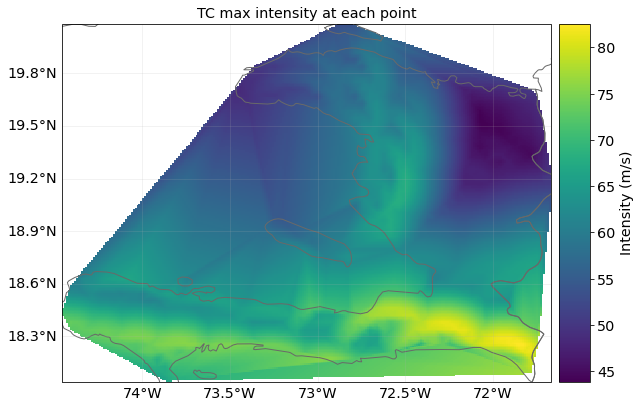

In [52]:
client = Client()
tc_haiti = client.get_hazard('tropical_cyclone', properties={'country_name': 'Haiti', 'climate_scenario': 'rcp45', 'ref_year':'2040', 'nb_synth_tracks':'10'})
tc_haiti.plot_intensity(0)

### The wrapper functions client.get_litpop_default() 
gets the default litpop, with exponents (1,1) and 'produced capital' as financial mode. If no country is given, the global dataset will be downloaded.

In [28]:
litpop_default = client.get_property_values(litpop_dataset_infos, known_property_values = {'fin_mode':'pc', 'exponents':'(1,1)'})

In [12]:
litpop = client.get_litpop_default(country='Haiti')

2022-01-14 08:51:51,587 - climada.entity.exposures.base - INFO - Reading /Users/szelie/climada/data/exposures/litpop/LitPop_150arcsec_HTI/v1/LitPop_150arcsec_HTI.hdf5


### Get the default impact function for tropical cyclones

2022-01-14 08:51:53,939 - climada.entity.impact_funcs.base - WARNING - For intensity = 0, mdd != 0 or paa != 0. Consider shifting the origin of the intensity scale. In impact.calc the impact is always null at intensity = 0.


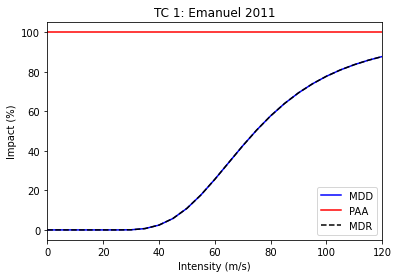

In [13]:
from climada.entity.impact_funcs import ImpactFuncSet, ImpfTropCyclone

imp_fun = ImpfTropCyclone.from_emanuel_usa()
imp_fun.check()
imp_fun.plot()

imp_fun_set = ImpactFuncSet()
imp_fun_set.append(imp_fun)

litpop.impact_funcs = imp_fun_set

### Calculate the impact

In [57]:
from climada.engine import Impact
impact = Impact()
impact.calc(litpop, imp_fun_set, tc_haiti)

2022-01-13 22:36:23,000 - climada.entity.exposures.base - INFO - Matching 1329 exposures with 1329 centroids.
2022-01-13 22:36:23,033 - climada.util.coordinates - INFO - No exact centroid match found. Reprojecting coordinates to nearest neighbor closer than the threshold = 100
2022-01-13 22:36:23,041 - climada.engine.impact - INFO - Calculating damage for 1329 assets (>0) and 37862 events.
2022-01-13 22:36:23,042 - climada.entity.exposures.base - INFO - No specific impact function column found for hazard TC. Using the anonymous 'impf_' column.


### Getting other Exposures

In [20]:
crop_dataset_infos = client.list_dataset_infos(data_type='crop_production')

client.get_property_values(crop_dataset_infos)

{'irrigation_status': ['noirr', 'firr'],
 'crop': ['ric', 'mai', 'soy', 'whe'],
 'unit': ['USD', 'Tonnes'],
 'spatial_coverage': ['global']}

In [22]:
rice_exposure = client.get_exposures(exposures_type='crop_production', properties = {'crop':'ric', 'unit': 'USD','irrigation_status': 'noirr'})

2022-01-24 17:45:07,991 - climada.entity.exposures.base - INFO - Reading /Users/szelie/climada/data/exposures/crop_production/crop_production_ric-noirr_spamray-mirca_USD/v1/crop_production_ric-noirr_spamray-mirca_USD.hdf5


# Technical Information

For programmatical access to the CLIMADA data API there is a specific REST call wrapper class: `climada.util.client.Client`.

## Server
The CLIMADA data file server is hosted on https://data.iac.ethz.ch that can be accessed via a REST API at https://climada.ethz.ch.
For REST API details, see the [documentation](https:/climada.ethz.ch/rest/docs).

## Client

In [62]:
Client?

In [66]:
client = Client()
client.chunk_size

8192

The url to the API server and the chunk size for the file download can be configured in 'climada.conf'. Just replace the corresponding default values:

```json
    "data_api": {
        "host": "https://climada.ethz.ch",
        "chunk_size": 8192,
        "cache_db": "{local_data.system}/.downloads.db"
    }
```

The other configuration value affecting the data_api client, `cache_db`, is the path to an SQLite database file, which is keeping track of the files that are successfully downloaded from the api server. Before the Client attempts to download any file from the server, it checks whether the file has been downloaded before and if so, whether the previously downloaded file still looks good (i.e., size and time stamp are as expected). If all of this is the case, the file is simply read from disk without submitting another request.

## Metadata

### Unique Identifiers
Any dataset can be identified with **data_type**, **name** and **version**. The combination of the three is unique in the API servers' underlying database.
However, sometimes the name is already enough for identification.
All datasets have a UUID, a universally unique identifier, which is part of their individual url. 
E.g., the uuid of the dataset https://climada.ethz.ch/rest/dataset/b1c76120-4e60-4d8f-99c0-7e1e7b7860ec is "b1c76120-4e60-4d8f-99c0-7e1e7b7860ec".
One can retrieve their meta data by:

In [69]:
client.get_dataset_info_by_uuid('b1c76120-4e60-4d8f-99c0-7e1e7b7860ec')

DatasetInfo(uuid='b1c76120-4e60-4d8f-99c0-7e1e7b7860ec', data_type=DataTypeShortInfo(data_type='litpop', data_type_group='exposures'), name='LitPop_assets_pc_150arcsec_SGS', version='v1', status='active', properties={'res_arcsec': '150', 'exponents': '(3,0)', 'fin_mode': 'pc', 'spatial_coverage': 'country', 'date_creation': '2021-09-23', 'climada_version': 'v2.2.0', 'country_iso3alpha': 'SGS', 'country_name': 'South Georgia and the South Sandwich Islands', 'country_iso3num': '239'}, files=[FileInfo(uuid='b1c76120-4e60-4d8f-99c0-7e1e7b7860ec', url='https://data.iac.ethz.ch/climada/b1c76120-4e60-4d8f-99c0-7e1e7b7860ec/LitPop_assets_pc_150arcsec_SGS.hdf5', file_name='LitPop_assets_pc_150arcsec_SGS.hdf5', file_format='hdf5', file_size=1086488, check_sum='md5:27bc1846362227350495e3d946dfad5e')], doi=None, description="LitPop asset value exposure per country: Gridded physical asset values by country, at a resolution of 150 arcsec. Values are total produced capital values disaggregated propor

or by filtering:

### Data Set Status
The datasets of climada.ethz.ch may have the following stati:
- **active**: the deault for real life data
- **preliminary**: when the dataset is already uploaded but some information or file is still missing
- **expired**: when a dataset is inactivated again
- **test_dataset**: data sets that are used in unit or integration tests have this status in order to be taken seriously by accident
When collecting a list of datasets with `get_datasets`, the default dataset status will be 'active'. With the argument `status=None` this filter can be turned off.

### DatasetInfo Objects and DataFrames

As stated above `get_dataset` (or `get_dataset_by_uuid`) return a `DatasetInfo` object and `get_datasets` a list thereof.

In [23]:
from climada.util.api_client import DatasetInfo
DatasetInfo?

where files is a list of `FileInfo` objects:

In [5]:
from climada.util.api_client import FileInfo
FileInfo?

#### Convert into DataFrame
There are conveinience functions to easily convert datasets into pandas DataFrames, `get_datasets` and `expand_files`:

In [81]:
client.into_datasets_df?

In [14]:
from climada.util.api_client import Client
client = Client()
litpop_datasets = client.list_dataset_infos(data_type='litpop', properties={'country_name': 'South Georgia and the South Sandwich Islands'})
litpop_df = client.into_datasets_df(litpop_datasets)
litpop_df

,data_type,data_type_group,uuid,name,version,status,doi,description,license,activation_date,expiration_date,res_arcsec,exponents,fin_mode,spatial_coverage,date_creation,climada_version,country_iso3alpha,country_name,country_iso3num
0,litpop,exposures,b1c76120-4e60-4d8f-99c0-7e1e7b7860ec,LitPop_assets_pc_150arcsec_SGS,v1,active,None,LitPop asset value exposure per country: Gridd...,Attribution 4.0 International (CC BY 4.0),2021-09-13 09:08:28.358559+00:00,None,150,"(3,0)",pc,country,2021-09-23,v2.2.0,SGS,South Georgia and the South Sandwich Islands,239
1,litpop,exposures,3d516897-5f87-46e6-b673-9e6c00d110ec,LitPop_pop_150arcsec_SGS,v1,active,None,LitPop population exposure per country: Gridde...,Attribution 4.0 International (CC BY 4.0),2021-09-13 09:09:10.634374+00:00,None,150,"(0,1)",pop,country,2021-09-23,v2.2.0,SGS,South Georgia and the South Sandwich Islands,239
2,litpop,exposures,a6864a65-36a2-4701-91bc-81b1355103b5,LitPop_150arcsec_SGS,v1,active,None,LitPop asset value exposure per country: Gridd...,Attribution 4.0 International (CC BY 4.0),2021-09-13 09:09:30.907938+00:00,None,150,"(1,1)",pc,country,2021-09-23,v2.2.0,SGS,South Georgia and the South Sandwich Islands,239


In [13]:
client.into_files_df?

Signature: client.into_files_df(datasets)
Docstring:
Convenience function providing a DataFrame of files aligned with the input datasets.

Parameters
----------
datasets : list of DatasetInfo
    e.g., return of get_datasets

Returns
-------
pandas.DataFrame
    of the files' informations including dataset informations
File:      c:\users\me\www\climada_python\climada\util\api_client.py
Type:      function


In [14]:
client.into_files_df(litpop_datasets)

,data_type,data_type_group,uuid,name,version,status,doi,description,license,activation_date,...,geographical_scale,date_creation,climada_version,country_iso3alpha,country_name,url,file_name,file_format,file_size,check_sum
0,litpop,exposures,b1c76120-4e60-4d8f-99c0-7e1e7b7860ec,LitPop_assets_pc_150arcsec_SGS,v1,active,None,"LitPop CLIMADA Exposures by country, at a reso...",Attribution 4.0 International (CC BY 4.0),2021-09-13 09:08:28.358559+00:00,...,country,2021-09-23,v2.2.0,SGS,South Georgia and the South Sandwich Islands,https://data.iac.ethz.ch/climada/b1c76120-4e60...,LitPop_assets_pc_150arcsec_SGS.hdf5,hdf5,1086488,md5:27bc1846362227350495e3d946dfad5e
1,litpop,exposures,3d516897-5f87-46e6-b673-9e6c00d110ec,LitPop_pop_150arcsec_SGS,v1,active,None,"LitPop CLIMADA Exposures by country, at a reso...",Attribution 4.0 International (CC BY 4.0),2021-09-13 09:09:10.634374+00:00,...,country,2021-09-23,v2.2.0,SGS,South Georgia and the South Sandwich Islands,https://data.iac.ethz.ch/climada/3d516897-5f87...,LitPop_pop_150arcsec_SGS.hdf5,hdf5,1086488,md5:22f35f75219addb3f37bbd7a2030d994
2,litpop,exposures,a6864a65-36a2-4701-91bc-81b1355103b5,LitPop_150arcsec_SGS,v1,active,None,"LitPop CLIMADA Exposures by country, at a reso...",Attribution 4.0 International (CC BY 4.0),2021-09-13 09:09:30.907938+00:00,...,country,2021-09-23,v2.2.0,SGS,South Georgia and the South Sandwich Islands,https://data.iac.ethz.ch/climada/a6864a65-36a2...,LitPop_150arcsec_SGS.hdf5,hdf5,1086488,md5:a20972acfc30c7429f99a568c8288199


## Download

The wrapper functions get_exposures or get_hazard fetch the information, download the file and opens the file as a climada object. But one can also download files using the following methods:

There are two methods to download files through the API: `download_dataset` which takes a `DatasetInfo` as argument and downloads all files of the dataset at once and `download_file` which takes a single `FileInfo` object as argument.

In [82]:
client.download_dataset?

In [83]:
client.download_file?

#### Cache
Both methods avoid superfluous downloads by keeping track of all downloads in a sqlite db file. The client will make sure that the same file is never downloaded to the same target twice.

#### Examples

In [24]:
ds = litpop_datasets[0]
download_dir, ds_files = client.download_dataset(ds)
ds_files[0], ds_files[0].is_file()

(PosixPath('/Users/szelie/climada/data/exposures/litpop/LitPop_assets_pc_150arcsec_SGS/v1/LitPop_assets_pc_150arcsec_SGS.hdf5'),
 True)

In [25]:
from pathlib import Path
ds_file = client.download_file(Path('.'), ds.files[0])
ds_file, ds_file.is_file()

(PosixPath('LitPop_assets_pc_150arcsec_SGS.hdf5'), True)